In [71]:
# 기본
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import glob

# 경고 뜨지 않게 설정
import warnings
warnings.filterwarnings('ignore')

# 그래프 설정
sns.set()

# 그래프 기본 설정
plt.rcParams['font.family'] = 'Malgun Gothic'
# plt.rcParams['font.family'] = 'AppleGothic'
plt.rcParams['figure.figsize'] = 12, 6
plt.rcParams['font.size'] = 14
plt.rcParams['axes.unicode_minus'] = False

# 결측치 시각화를 위한 라이브러리
import missingno

# 데이터 전처리 알고리즘
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

# 학습용과 검증용으로 나누는 함수
from sklearn.model_selection import train_test_split

# 교차 검증
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold

# 평가함수
# 분류용
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score

# 회귀용
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

# 모델의 최적의 하이퍼 파라미터를 찾기 위한 도구
from sklearn.model_selection import GridSearchCV

# 머신러닝 알고리즘 - 분류
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import VotingClassifier

# 머신러닝 알고리즘 - 회귀
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import VotingRegressor

# 학습 모델 저장을 위한 라이브러리
import pickle

pd.set_option('display.max_rows', 1000)

In [7]:
# 파일 경로 패턴 설정
file_paths = glob.glob('open/train/5.잔액정보/*_잔액정보.parquet')

# 파일들을 읽어서 리스트에 담고 모두 concat
df_list = [pd.read_parquet(path) for path in file_paths]
train_df = pd.concat(df_list, ignore_index=True)

# 확인
print(train_df.shape)
train_df.head()

(2400000, 82)


,기준년월,ID,잔액_일시불_B0M,잔액_할부_B0M,잔액_현금서비스_B0M,잔액_리볼빙일시불이월_B0M,잔액_리볼빙CA이월_B0M,잔액_카드론_B0M,월중평잔_일시불_B0M,월중평잔_할부_B0M,...,평잔_6M,평잔_일시불_6M,평잔_일시불_해외_6M,평잔_RV일시불_6M,평잔_RV일시불_해외_6M,평잔_할부_6M,평잔_할부_해외_6M,평잔_CA_6M,평잔_CA_해외_6M,평잔_카드론_6M
0,201807,TRAIN_000000,998,962,22971,0,0,0,1084,547,...,15988,2440,0,0,0,572,0,17008,0,0
1,201807,TRAIN_000001,2565,2390,0,0,0,0,4090,2553,...,7045,2677,0,2830,0,2736,0,0,0,0
2,201807,TRAIN_000002,5312,5113,21531,6795,0,0,5006,8778,...,66549,9118,0,8870,0,4429,0,43351,0,0
3,201807,TRAIN_000003,730,5025,26284,0,0,0,487,5607,...,30139,884,0,0,0,5097,0,30697,0,0
4,201807,TRAIN_000004,0,0,0,0,0,0,0,0,...,28,21,0,0,0,0,0,0,0,0


In [9]:
# 데이터 프레임 정보 확인
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2400000 entries, 0 to 2399999
Data columns (total 82 columns):
 #   Column             Dtype  
---  ------             -----  
 0   기준년월               int64  
 1   ID                 object 
 2   잔액_일시불_B0M         int64  
 3   잔액_할부_B0M          int64  
 4   잔액_현금서비스_B0M       int64  
 5   잔액_리볼빙일시불이월_B0M    int64  
 6   잔액_리볼빙CA이월_B0M     int64  
 7   잔액_카드론_B0M         int64  
 8   월중평잔_일시불_B0M       int64  
 9   월중평잔_할부_B0M        int64  
 10  월중평잔_CA_B0M        int64  
 11  카드론잔액_최종경과월        int64  
 12  연체일자_B0M           float64
 13  연체잔액_B0M           int64  
 14  연체잔액_일시불_B0M       int64  
 15  연체잔액_할부_B0M        int64  
 16  연체잔액_현금서비스_B0M     int64  
 17  연체잔액_카드론_B0M       int64  
 18  연체잔액_대환론_B0M       int64  
 19  잔액_현금서비스_B1M       int64  
 20  잔액_현금서비스_B2M       int64  
 21  잔액_카드론_B1M         int64  
 22  잔액_카드론_B2M         int64  
 23  잔액_카드론_B3M         int64  
 24  잔액_카드론_B4M         int64  
 25  잔액_카드론_B5M        

In [11]:
# 결측치 확인
train_df.isna().sum()

기준년월            0
ID              0
잔액_일시불_B0M      0
잔액_할부_B0M       0
잔액_현금서비스_B0M    0
               ..
평잔_할부_6M        0
평잔_할부_해외_6M     0
평잔_CA_6M        0
평잔_CA_해외_6M     0
평잔_카드론_6M       0
Length: 82, dtype: int64

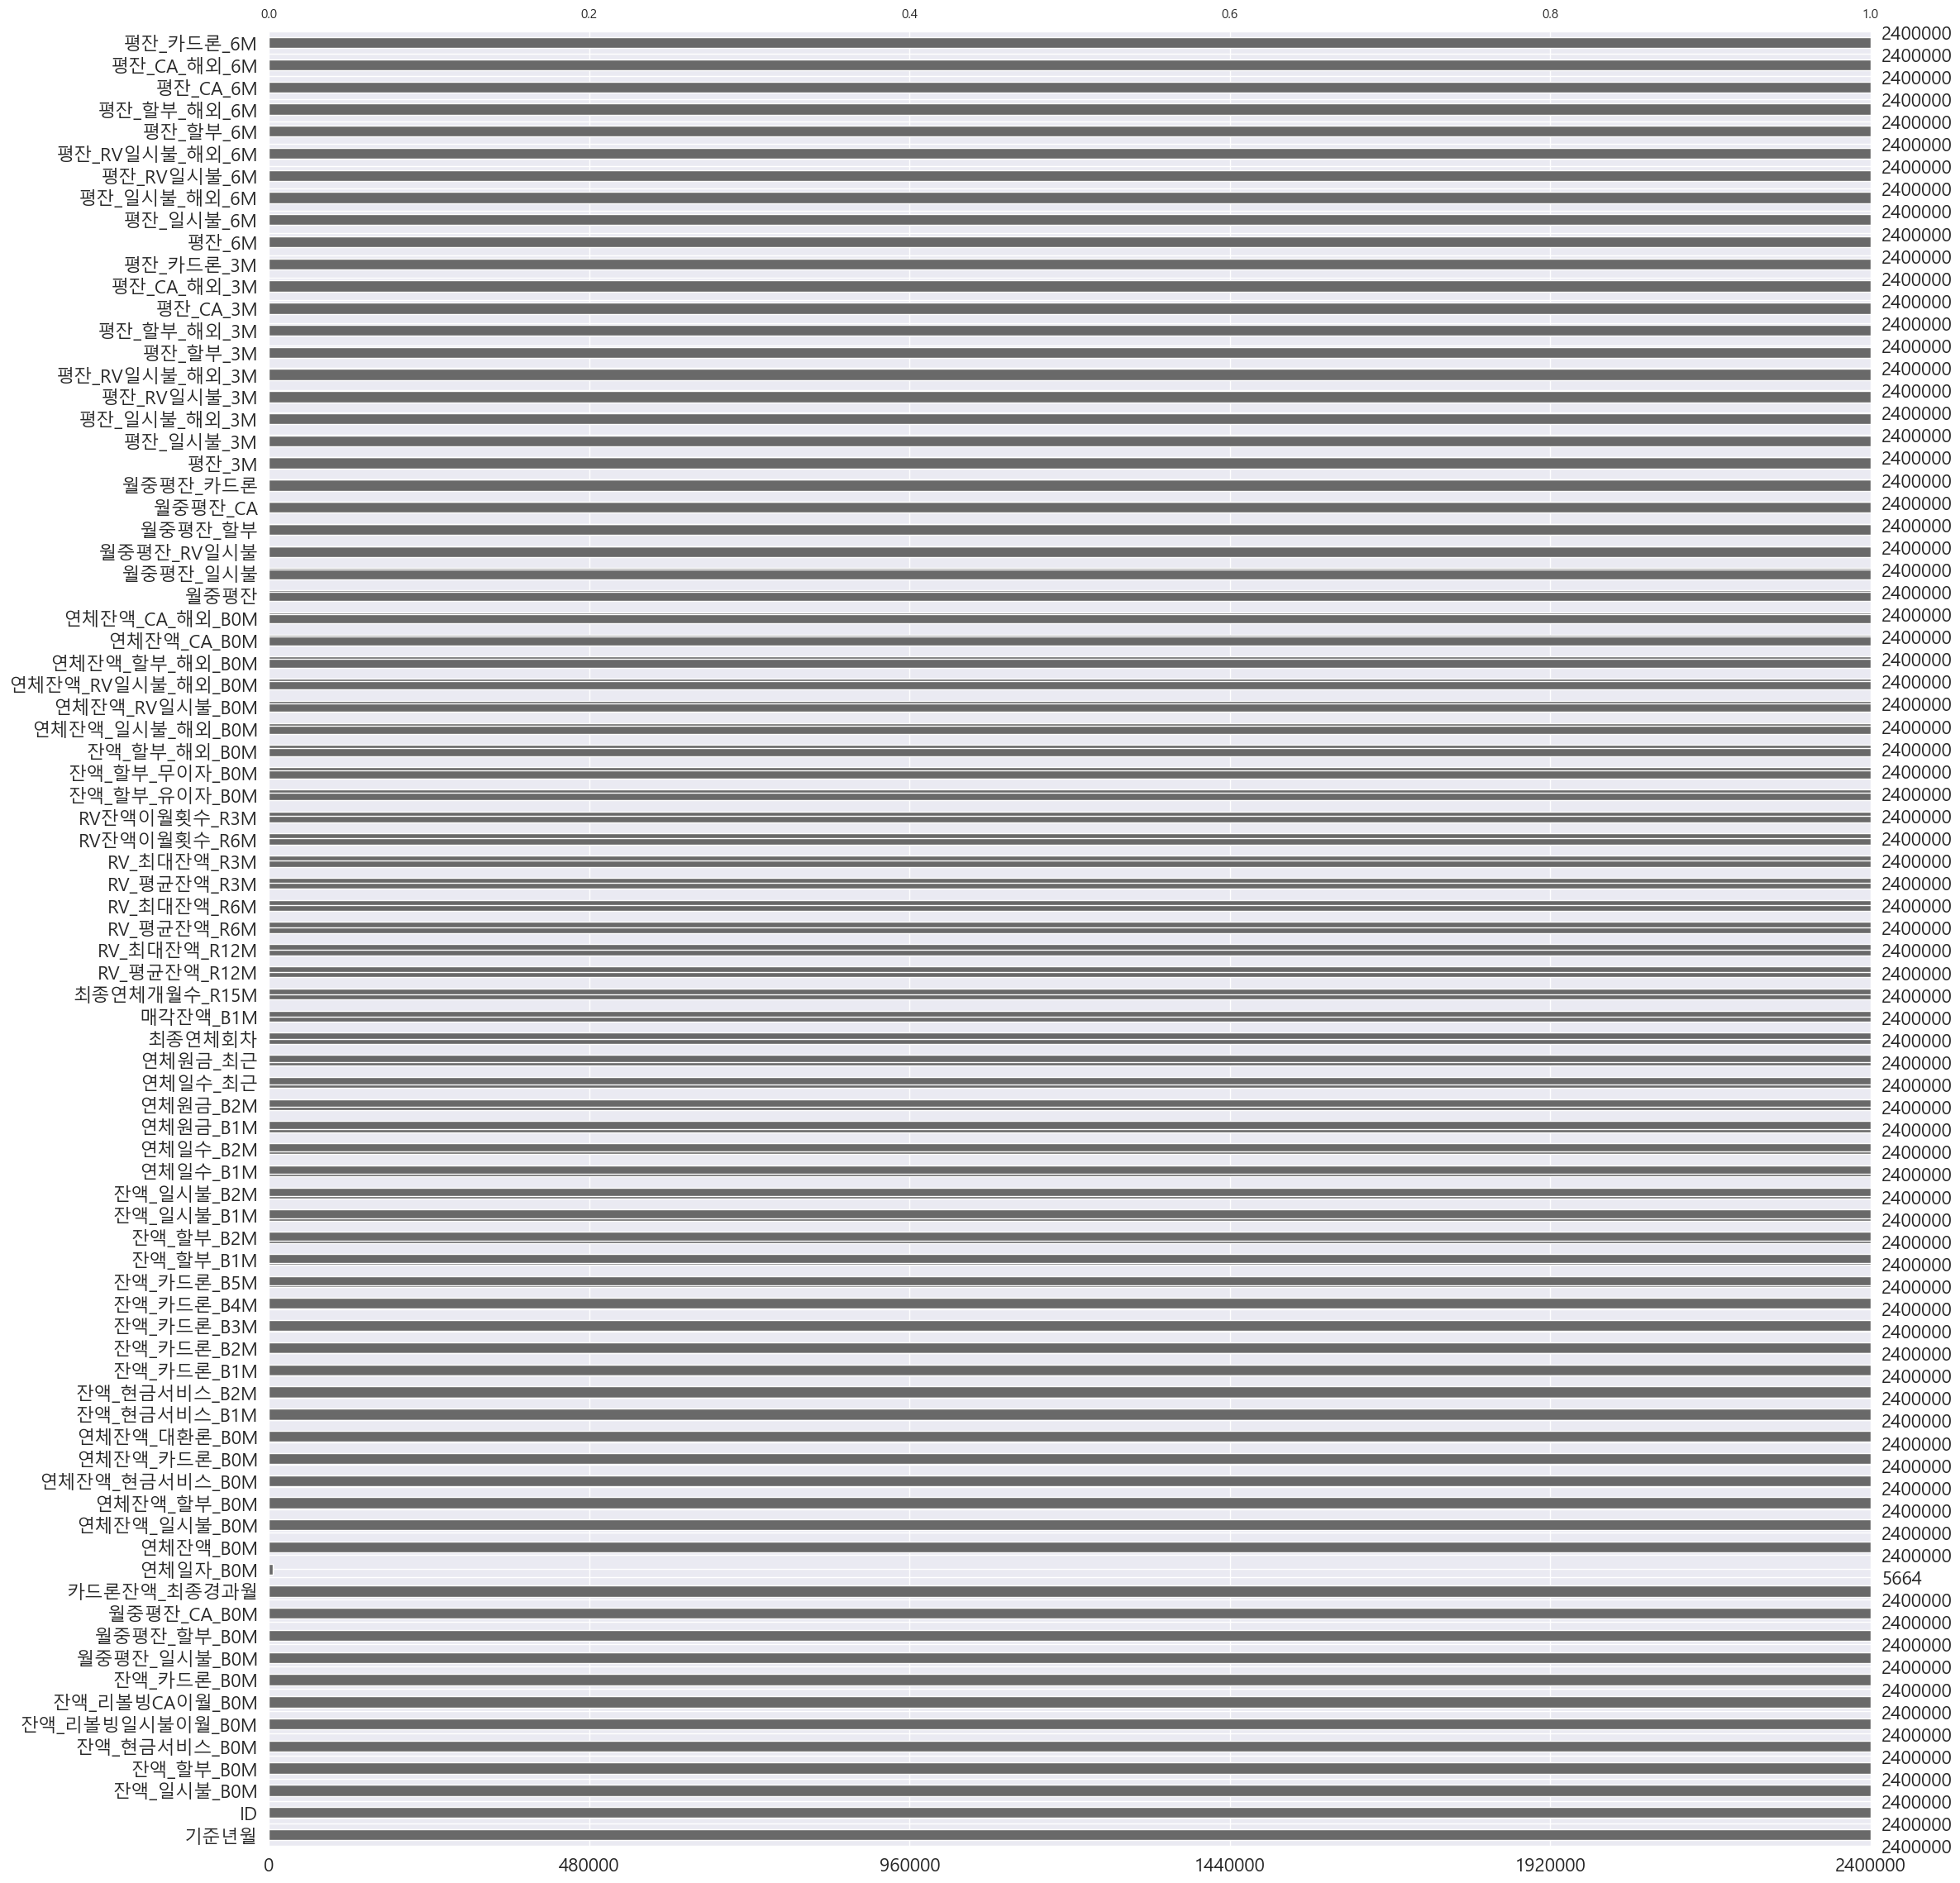

In [13]:
# 각 컬럼별 결측치 현황을 막대 그래프 형태로 확인해본다.
# 결측치를 제외한 데이터 개수
missingno.bar(train_df)
plt.show()

In [37]:
na_counts = train_df.isna().sum()
na_counts = na_counts[na_counts > 0]
print(na_counts.to_frame(name='결측치 개수'))

           결측치 개수
연체일자_B0M  2394336


<Axes: >

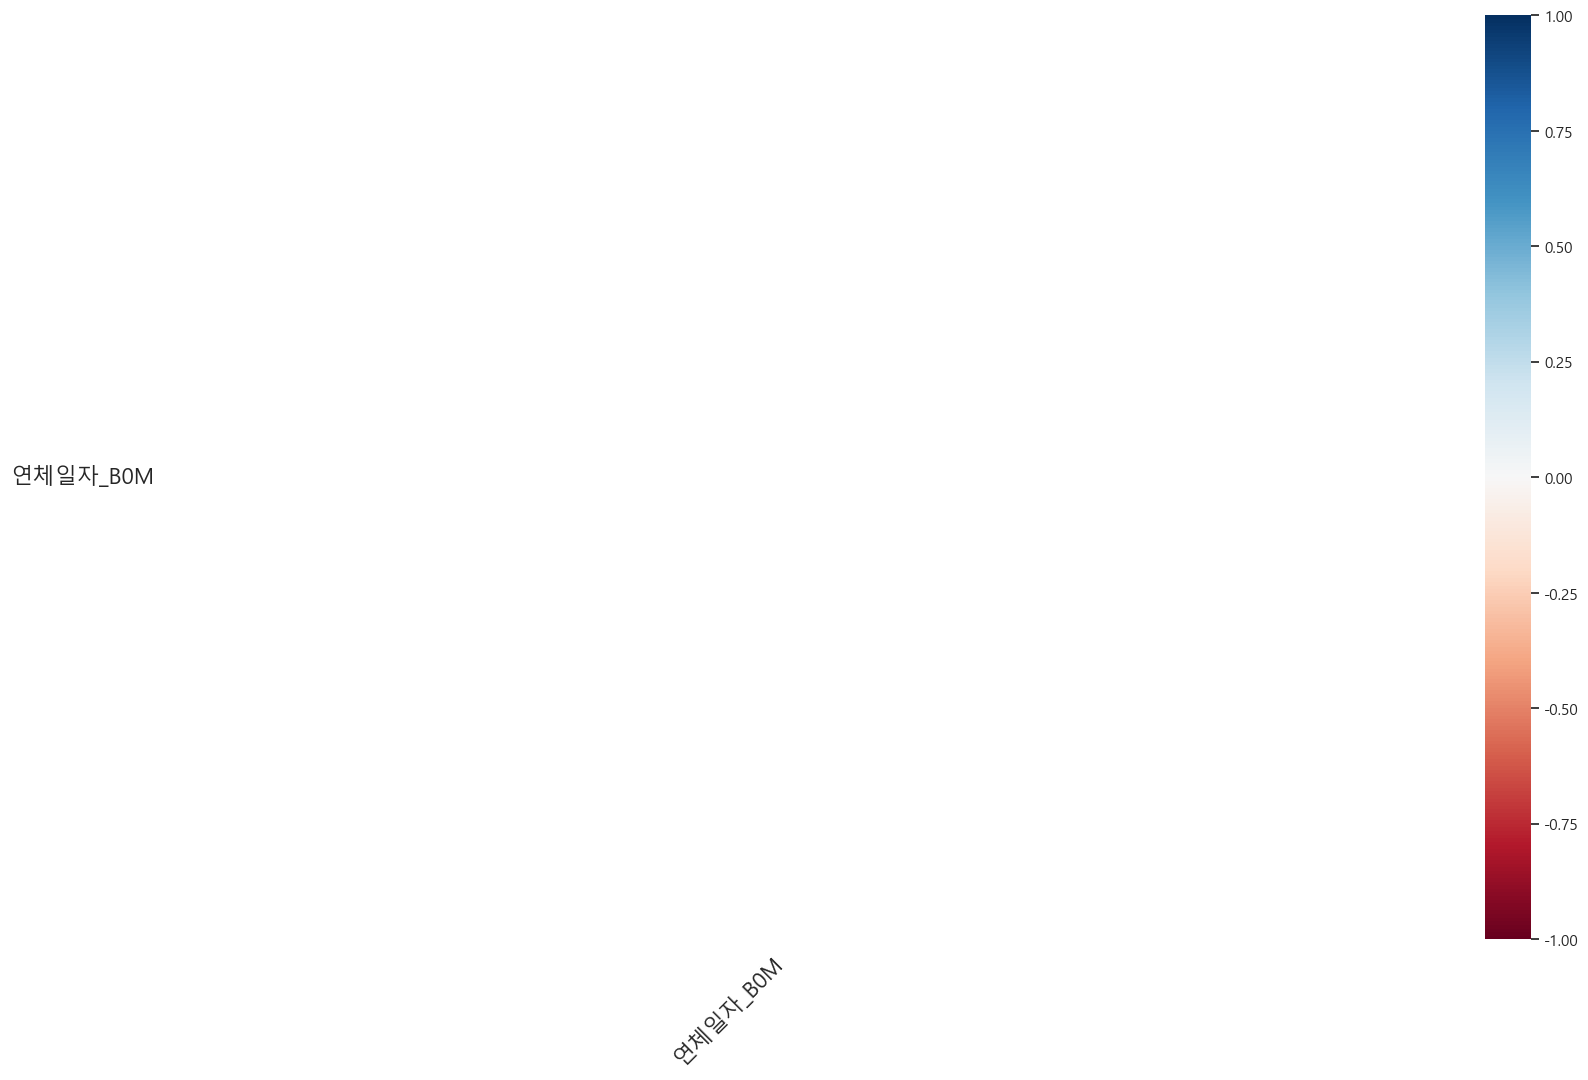

In [15]:
# 양의 상관 관계 : 하나의 변수에서 값이 누락될 때 다른 변수에서도 값이 누락될 가능성이 높은 것
# 음의 상관 관계 : 하나의 변수에서 값이 누락될 때 다른 변수에서는 값이 누락될 가능성이 낮은 것
# 0에 가까울 : 두 변수 값의 결측치값 유무가 서로 독립적이다.
missingno.heatmap(train_df)

<Axes: >

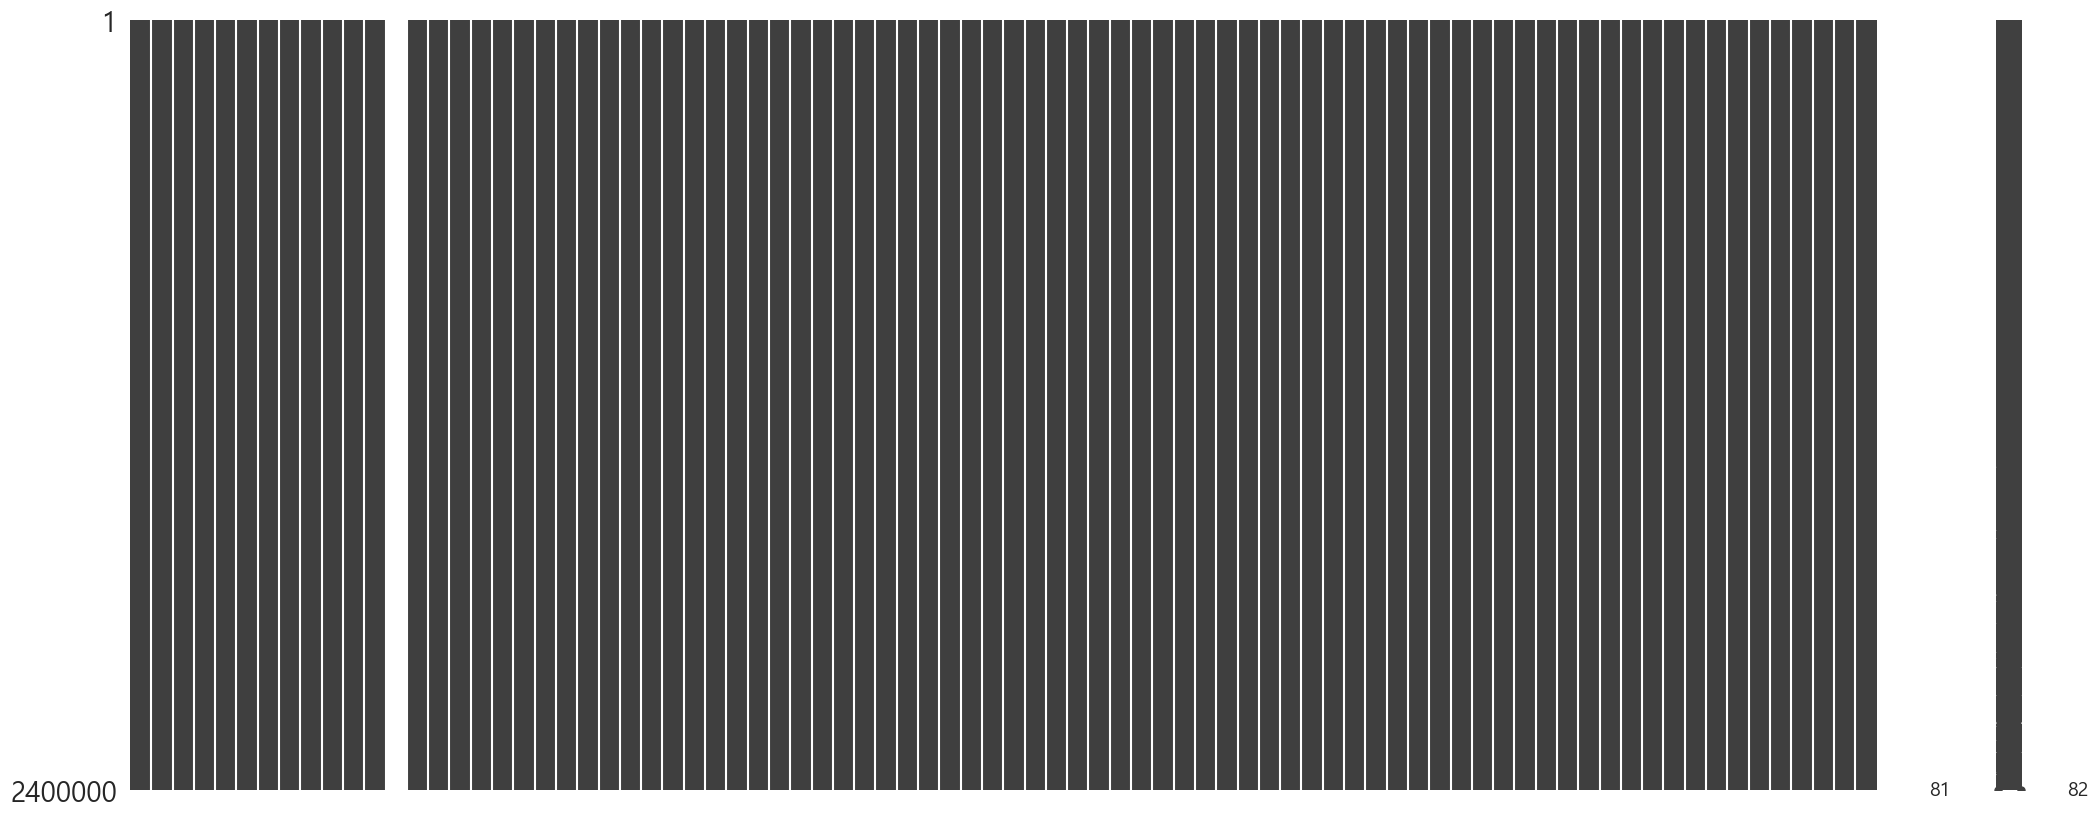

In [17]:
# 각 행별로 결측치가 어느 행에 있는지를 시각화한다.
missingno.matrix(train_df)

In [33]:
# 결측치 개수
na_count = train_df['연체일자_B0M'].isna().sum()

# 결측치가 아닌 값 개수 (유효값 개수)
notna_count = train_df['연체일자_B0M'].notna().sum()

# 전체 개수 
total = len(train_df)

print(f"총 데이터 수: {total}")
print(f"결측치 수: {na_count}")
print(f"결측 아님(값 있음) 수: {notna_count}")

총 데이터 수: 2400000
결측치 수: 2394336
결측 아님(값 있음) 수: 5664


In [35]:
cond1 = ((train_df['연체잔액_B0M'].isna() | (train_df['연체잔액_B0M'] == 0)) & train_df['연체일자_B0M'].isna())
cond2 = ((train_df['연체잔액_B0M'].notna() & (train_df['연체잔액_B0M'] > 0)) & train_df['연체일자_B0M'].isna())
cond3 = ((train_df['연체잔액_B0M'].isna() | (train_df['연체잔액_B0M'] == 0)) & train_df['연체일자_B0M'].notna())
cond4 = ((train_df['연체잔액_B0M'].notna() & (train_df['연체잔액_B0M'] > 0)) & train_df['연체일자_B0M'].notna())

print("연체잔액 없고 연체일자 없음:", cond1.sum())
print("연체잔액 있고 연체일자 없음:", cond2.sum())
print("연체잔액 없고 연체일자 있음:", cond3.sum())
print("연체잔액 있고 연체일자 있음:", cond4.sum())

연체잔액 없고 연체일자 없음: 2394327
연체잔액 있고 연체일자 없음: 9
연체잔액 없고 연체일자 있음: 2132
연체잔액 있고 연체일자 있음: 3532


In [53]:
# 결측치가 있는 모든 컬럼 제거
train_df_no_na = train_df.dropna(axis=1)
print(train_df.shape[1])
print(train_df_no_na.shape[1])

82
81


In [55]:
# CSV 파일로 저장
train_df_no_na.to_csv('train_잔액정보.csv', index=False, encoding='utf-8')
print("저장 완료")

저장 완료
